# BM 336546 - HW2: Type 1 Diabetes
# Submitting:  Jeremie Sasson 336319470 Rakefet Rozen 034148874



### Theory Questions:
**1)** To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

**1) Answer:** Model performance is more important for us. Accuracy may miss lead us specially if our data set is unbalanced. As an example, we will use a radical situation in which we have 99 non TID patient and only one sick patient. If our model always says that you’re not sick it will have an accuracy of 0.99. On the the hand: 

Sensitivity:
\begin{equation*}
Se = \frac{TP}{{TP+FN}} = 0
\end{equation*}
Specificity:
\begin{equation*}
Sep = \frac{TN}{{TN+FP}} =  \frac{99}{{99+1}} = 0.99
\end{equation*}
F1 score will be:
\begin{equation*}
F1 = \frac{TP}{{TP+\frac{1}{2}(FP+FN)}} =  \frac{0}{{0+\frac{1}{2}(0+1)}} = 0
\end{equation*} 

By looking at accuracy alone one might think the naive model works.

**2)** T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

**2) Answer:**

A model to predict heart attacks for TD1 patients that uses:
BP and BMI  - 
Pros: BMI is probably correlated with physical activity. BP is probably correlated with age. Income is probably not a significant feature for heart attacks. Meaning BP and BMI might be enough for creating such a model. A model based on 2 features will be easy to interpret. 
Cons: Using only these 2 feature may create a bias for example a person that has a high BMI because he is a weight lifter he would be in a good physical level with a high BMI. 

A model to predict heart attacks for TD1 patients that uses:
BP, BMI, Age, level of physical activity, income 
Pros: using many features may find connections that we are not aware of. We will be able to filter unnecessary feature by filtering technics and not filter the features without any considerations. 
Cons: The model will be less interpretable 

**3)** A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

**3) Answer:**
If the number of features she has is very large she should stick with Linear SVM and logistic regression because of the high complexity of the third. She should probably try all models and compare them. But probably The Linear SVM will be better for her. It works better with unstructured features such as image artifacts as explained above. It also finds the best margin between the two classes and by that improves misclassification and over fitting. (Our answer is based on a post: https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16)

**4)** What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

**4) Answer:**

The main difference is that SVM looks for the best margin and LR looks to maximize the probability of the data being on the right side of the hyper plane.
They share most of their hyper params. Both have a regulation inverse parameter that gives a penalty for making the hyperplane complex. Both can use different penalty functions (l1, l2). The SVM can also work with different loss functions hinge or squared hinge. The logitic regression loss functions are cross antropy and log loss.
The hyper parameters are almost similar in the concept of how complex will the separating hyperplane, but the optimization is done as explained before in logistic regression for the probability of being right in the classification and in the SVM for the width of the margin between the groups.
The gap to minimise in SVM is the ortogonal distance of the points from the hyperplane and in logistic regression the gaps to minimize are according to the points specific axis distance to the hyperplane.

### Coding Assignment:

**1) Load the data. Explain any preprocessing:**
    
Answer: preprocessing contains: 

String to value: any string value is changed to 0/1 meaning one hot vector

Missing parameters: filling with random values taken from the density of feature.

We removed all outliers that Age feature presented.
We use min max normalization it performs best on attribute data and we removed the ouliers from the age so no bias is predicted.

Normelize only after the train test split, to avoid data leakage.


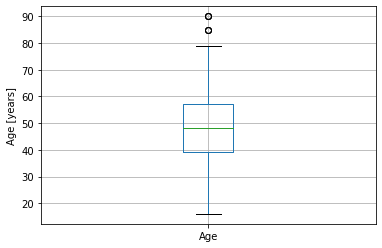

In [17]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
from pathlib import Path
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster import hierarchy as hc
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold as SKFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
import seaborn as sns
from HW2_functions import pre_process,split_data,visualizationAndExploration,show_feature_label_relationship, show_feature_2_feature_relationship, calc_CV, report_evaluation_matrics, random_forest_importance, scatter_plot
plt.close('all')
pd.options.mode.chained_assignment = None 

#open a file handler
file_handler = open("HW2_data.csv", "r")
#Read K1D dat set
K1D_data = pd.read_csv(file_handler, sep=",")
#Close file handler
file_handler.close()
#Take the output coulum
Diagnosis = K1D_data[['Diagnosis']]
#Pre process without normelizing to avoid data leakage. We will normelize after data split:
K1D_data_work = pre_process(K1D_data)




**2) Perform a test-train split of 20% test:**

Because we use cross validation we will not normelize here but in the cross validation function.

In [18]:
#Train test split 20:80 we use stratify to make sure the split includes the same distribution of Diagnosis output in both train and test

X_train, X_test, y_train, y_test, X_train_df, X_test_df = split_data(K1D_data_work, ['Diagnosis'])


**3) Provide a detailed visualization and exploration of the data:**

a. An analysis to show that the distribution of the features is similar between test and train

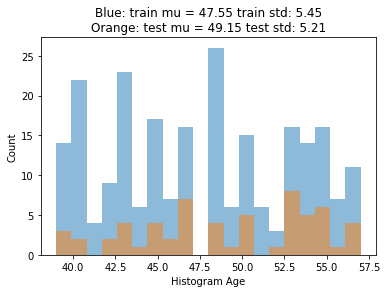

,positive feature,positive train [%],positive test [%],diff train test [%]
0,Gender,36.5546,40,-3.44538
1,Increased Urination,49.5798,46.6667,2.91317
2,Increased Thirst,50.4202,48.3333,2.08683
3,Sudden Weight Loss,51.2605,45,6.2605
4,Weakness,65.1261,63.3333,1.79272
5,Increased Hunger,44.958,46.6667,-1.70868
6,Genital Thrush,29.8319,21.6667,8.16527
7,Visual Blurring,41.5966,53.3333,-11.7367
8,Itching,55.042,60,-4.95798
9,Irritability,23.1092,20,3.10924


In [19]:
#Detailed visualization and exploration of the data:
bool_distribution_df = visualizationAndExploration(K1D_data_work, X_train_df, X_test_df, y_train, y_test)
bool_distribution_df

i. What issues could an imbalance of features between train and test cause?

**Answer:**
It can cause bias in the learning of the model. The model will not see all the typical values and as a result will probably missdiagnose those.

ii. How could you solve the issue?

**Answer:**
This can be solved by making sure the train and test are equally distributed or\and by enlarging the data set.
Also cross validation may help. Cross validation mixes the train and test sets so that way the models see a variety of different groups of the data. 

b. Plots to show the relationship between feature and label:

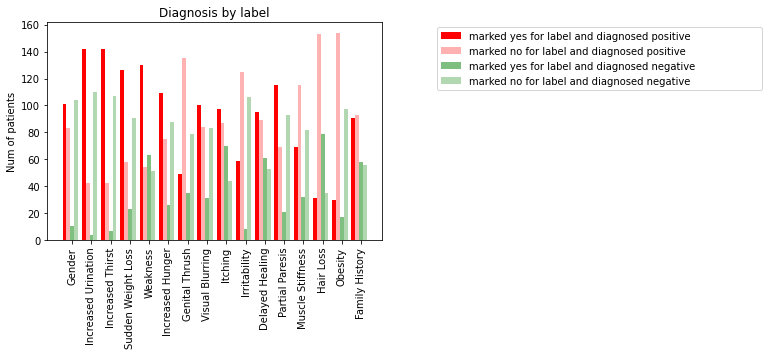

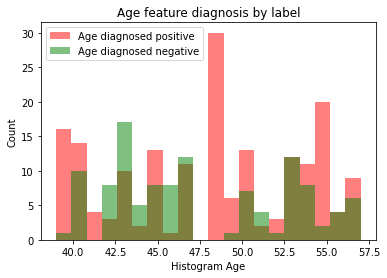

In [20]:

Diagnosis = K1D_data_work[['Diagnosis']]
show_feature_label_relationship(K1D_data_work, Diagnosis)


c. Additional plots that make sense given the mostly binary nature of this dataset.

**Answer:** The data set is mostly attribute data so a spearman correlation graph can tell us better the relationship between feature than a regular correlation graph. The graph was inspired from:
    https://www.analyticsvidhya.com/blog/2018/10/interpret-random-forest-model-machine-learning-programmers/


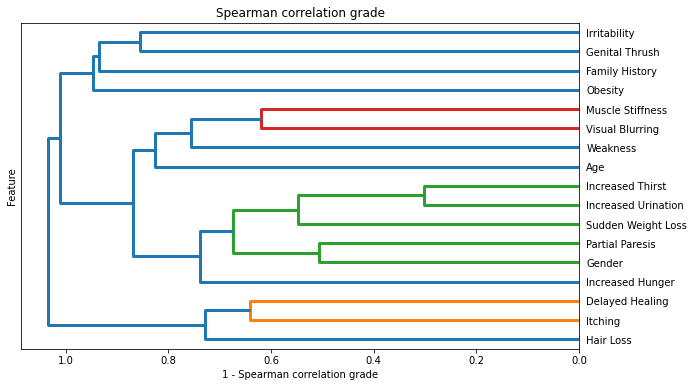

In [21]:
show_feature_2_feature_relationship(K1D_data_work)


d. State any insights you have

**Answer:** From the distribution of parameters in train and test according to the diagnosis we see that the startification did the work and we are working on a similar sets of distributed data from the diagnosis aspect. Both in the attributed and in the parameteric (Age).
We see a good agreement between gender thirst and urine to diagnosis outcome. We also see a correlation in the spearman correlation graph between urine and thirst which make also sense. 
Also the obisity and age feature did not show that it is correlated with positive diagnosis which in the case of type II diabitis might surprise us but not for type I diabitis which is a condition one carries from childhood.

i. Was there anything unexpected?

**Answer:** We were surprised to see from the spearman correlation graph that family history has no correlation with any of the other features.Also the gender feature showed that females are sagnifecantly more positive than negative while for males the difference is quite small. 


ii. Are there any features that you feel will be particularly important to your model? Explain why.

**Answer:** Yes, from the feature to label bar graphs it seems that Increase of thirst, Increase of Urine, Sudden Weight Loss, Weakness
Increased Hunger and Visual Blurring have a change of label with a change in feature attribute.
We can also see that these features are correlated from the spearman graph.
As for the above the important feature will probably be included in this set

4) Encode all your data as one hot vectors.

**Answer:** 
We encoded our data in to one hot vector in the preprocessing part only by changing yes\no to 0\1. We understand the use of one hot vector in the case of attribute data that includes more than 2 atributes. It creates binary representation which the model can't have order between. In our case all attribute features are boolean. There is no logic of using one hot vector in that case as for the values are already binary. 
So our initial preprocessing creates a fine one hot vector for model evaluation


5. Choose, build and optimize Machine Learning Models:

a. Use 5k cross fold validation and tune the models to achieve the highest test AUC:
i. Train one or more linear model on your training set
ii. Train one or more non-linear models on your training set
b. Report the appropriate evaluation metrics of the train and test sets (AUC, F1, LOSS, ACC).



In [22]:
K=5
scoreCV = []
H1 = [0.01, 0.1, 1, 10, 100]  # C0
H2 = ['l1', 'l2']  # penalty
for h1 in H1:
    for h2 in H2:
        classifierLR = LogisticRegression(C=h1, penalty=h2, random_state=0, solver='saga', max_iter=10000)
        mu_auc, sigma_auc = calc_CV(X_train, y_train, classifierLR, K)
        scoreCV.append({'C': h1, 'penalty': h2, 'mu auc': mu_auc, 'sigma auc': sigma_auc})
print(pd.DataFrame(scoreCV))
scoreCV = []
scoreCV = []
H1 = [0.01, 0.1, 1, 10]  # C'
H2 = ['linear', 'rbf']  # kernel
for h1 in H1:
    for h2 in H2:
        classifierSVC = svm.SVC(C=h1, kernel=h2, max_iter=10, random_state=0, probability=True)
        mu_auc, sigma_auc = calc_CV(X_train, y_train, classifierSVC, K)
        scoreCV.append({'C': h1, 'kernel': h2, 'mu_auc': mu_auc, 'sigma_auc': sigma_auc})
print(pd.DataFrame(scoreCV))

        C penalty    mu auc  sigma auc
0    0.01      l1  0.500000   0.000000
1    0.01      l2  0.729946   0.054428
2    0.10      l1  0.873880   0.041441
3    0.10      l2  0.927788   0.027066
4    1.00      l1  0.938669   0.038318
5    1.00      l2  0.940125   0.034585
6   10.00      l1  0.926040   0.026547
7   10.00      l2  0.931595   0.023214
8  100.00      l1  0.926040   0.024542
9  100.00      l2  0.922591   0.021910
       C  kernel    mu_auc  sigma_auc
0   0.01  linear  0.718838   0.045711
1   0.01     rbf  0.944392   0.028199
2   0.10  linear  0.840542   0.064224
3   0.10     rbf  0.933281   0.050853
4   1.00  linear  0.869968   0.050930
5   1.00     rbf  0.923866   0.034085
6  10.00  linear  0.799526   0.036559
7  10.00     rbf  0.930599   0.029352


**Answer:**
The best performance is achieved by the SVM with RBF kernel model with C=1. In the SVM models best achieved by the non linear model with an RBF kernel

Logistic regression k fold results show that best results are achived from hyperparameters: C=1,with a penalty function  l2

Linear SVM k fold results show that best results are achived from hyperparameters: C= 1

SVM with RBF kernel k fold results show that best results are achived from hyperparameters: C= 0.01 

We train our entire train set on the chosen params and calculate the required scores AUC, F1, LOSS, ACC:


Logistic regression: AUC is: 98.65%
Logistic regression: F1 score is: 98.25%
Logistic regression: Accuracy is: 98.33%


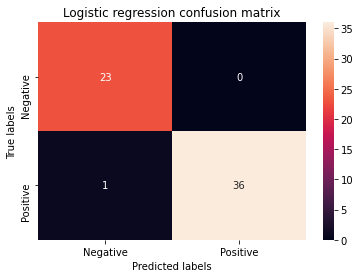

Linear SVM: AUC is: 95.95%
Linear SVM: F1 score is: 94.83%
Linear SVM: Accuracy is: 95.00%


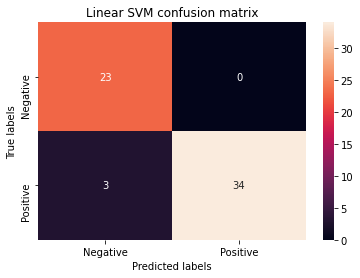

SVM with RBF kernel: AUC is: 85.08%
SVM with RBF kernel: F1 score is: 85.65%
SVM with RBF kernel: Accuracy is: 86.67%


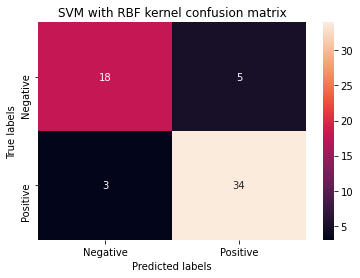

In [24]:
classifierLR = LogisticRegression(C=1, penalty='l2', random_state=0, solver='saga', max_iter=10000)
classifierLinearSVC = svm.SVC(C=1, kernel='linear', max_iter=10, random_state=0, probability=True)
classifierRBFSVC = svm.SVC(C=0.01, kernel='rbf', max_iter=10, random_state=0, probability=True)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
report_evaluation_matrics('Logistic regression', classifierLR, X_train_scaled, X_test_scaled, y_train, y_test)
report_evaluation_matrics('Linear SVM', classifierLinearSVC, X_train_scaled, X_test_scaled, y_train, y_test)
report_evaluation_matrics('SVM with RBF kernel', classifierRBFSVC, X_train_scaled, X_test_scaled, y_train, y_test)

c. What performs best on this dataset? Linear or non-linear models?

**Answer:** 
Linear models perform better on this data set
The best performing model is the Logistic regression with  AUC: 98.65%, F1: 98.25%, Accuracy: 98.33%


6) Feature Selection 
a. As seen previously, a Random Forest Network can be used to explore feature importance. Train a Random Forest on your data.

   n_estimators  max_depth    mu_auc  sigma_auc
0             2          3  0.906098   0.049103
1             2          4  0.904580   0.052662
2             2          6  0.939310   0.054101
3             5          3  0.934569   0.031296
4             5          4  0.923458   0.045346
5             5          6  0.953396   0.036165
6             6          3  0.926614   0.047947
7             6          4  0.945388   0.029180
8             6          6  0.975326   0.024554
Random forest: AUC is: 97.83%
Random forest: F1 score is: 98.22%
Random forest: Accuracy is: 98.33%


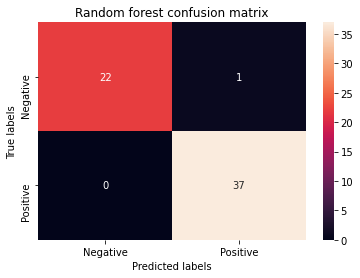

<AxesSubplot:title={'center':'Importancy graph'}, ylabel='Feature name'>

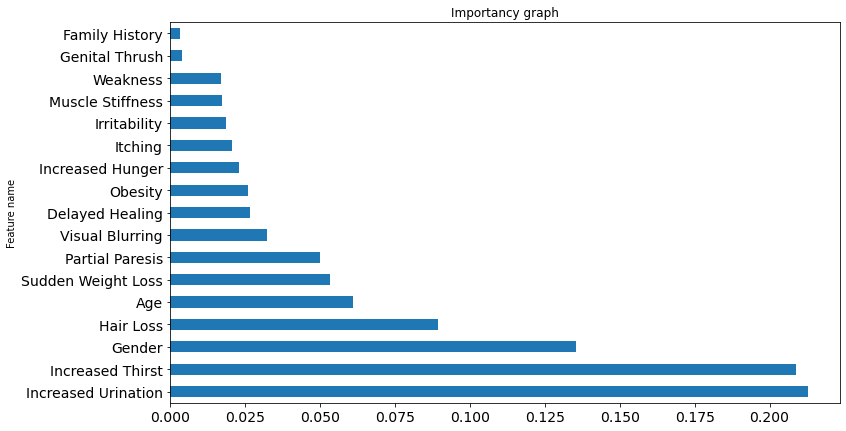

In [28]:
scoreCV = []
H1 = [2,5,6] #n_estimators
H2 = [3,4,6] #max_depth
for h1 in H1:
    for h2 in H2:
        classifierRF = RandomForestClassifier(n_estimators=h1, max_depth=h2, bootstrap=False, n_jobs=-1,  random_state =0)
        mu_auc, sigma_auc = calc_CV(X_train, y_train, classifierRF, K)
        scoreCV.append({'n_estimators':h1,'max_depth':h2,'mu_auc': mu_auc,'sigma_auc':sigma_auc})
print(pd.DataFrame(scoreCV))
classifierRF = RandomForestClassifier(n_estimators=6, max_depth=6, bootstrap=False, n_jobs=-1, random_state=0)
report_evaluation_matrics('Random forest', classifierRF, X_train_scaled, X_test_scaled, y_train, y_test)
df_imp = pd.DataFrame({'Feature name':K1D_data_work.drop(['Diagnosis'],  axis=1).columns, 'imp':classifierRF.feature_importances_}).sort_values('imp', ascending=False)
#fig, ax = plt.subplots()
imp = df_imp.round({'imp': 4})
imp.plot('Feature name','imp','barh', figsize=(12,7), legend=False, fontsize = '14',title='Importancy graph')

i. What are the 2 most important features according to the random forest.

**Answer:** The two most important features are Increase urination and Increase Thirst. 

ii. Does this match up exactly with the feature exploration you did?

**Answer:** It does match the exploration phase, where we found the best fit between these features and the output label.

7. Data Separability Visualization:
a. Perform dimensionality reduction on the dataset so that you can plot your data in a 2d plot (show samples with positive and negative labels in different colors).


In [29]:
pca = PCA(n_components=2)
scaler = StandardScaler()
X_train_standart_scaled = scaler.fit_transform(X_train)
X_test_standart_scaled = scaler.transform(X_test)
X_train_new = pca.fit_transform(X_train_standart_scaled)
X_test_new = pca.transform(X_test_standart_scaled)

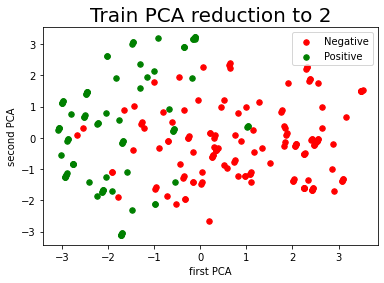

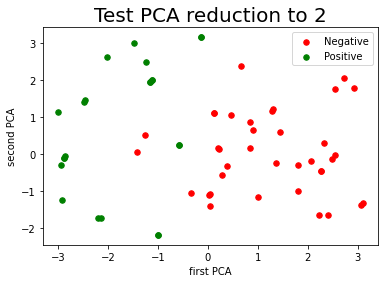

In [30]:
fig, ax = plt.subplots()
scatter_plot(X_train_new, y_train, 'first PCA', 'second PCA', 'Train PCA reduction to 2')
scatter_plot(X_test_new, y_test, 'first PCA', 'second PCA', 'Test PCA reduction to 2')

b. How separable is your data when reduced to just two features?

**Answer:**

First we would like to mention that performing a PCA reduction to a binary data set is not a good methodology. PCA dimantionalty reduction is based on projecting on the two dimentions where the data has the heighest standart diviation. Meaning it is based on the notion that the data is normaly ditributed. In our case only the age parameter is normaly distributed. All other parameters are boolean and not parameteric so PCA would not be optimal for those. 

After stating that, we do see in the graph a trend of seperation to labels

c. Train the same models above on the dimensionality-reduced training set.



PCA Logistic regression: AUC is: 88.60%
PCA Logistic regression: F1 score is: 89.23%
PCA Logistic regression: Accuracy is: 90.00%


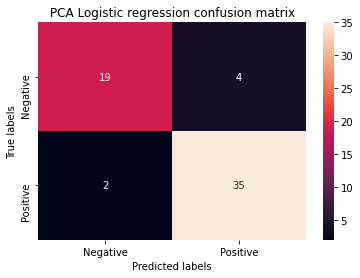

PCA Linear SVM: AUC is: 50.00%
PCA Linear SVM: F1 score is: 38.14%
PCA Linear SVM: Accuracy is: 61.67%


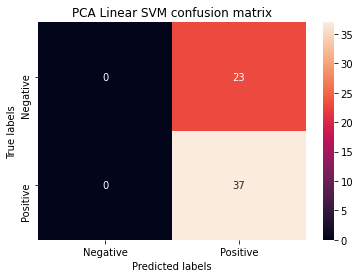

PCA SVM with RBF kernel: AUC is: 79.44%
PCA SVM with RBF kernel: F1 score is: 76.56%
PCA SVM with RBF kernel: Accuracy is: 76.67%


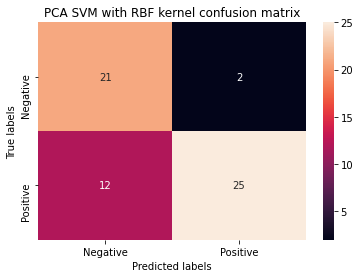

PCA Random forest: AUC is: 100.00%
PCA Random forest: F1 score is: 100.00%
PCA Random forest: Accuracy is: 100.00%


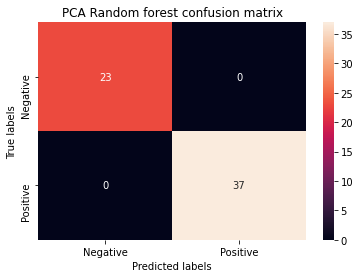

In [32]:
report_evaluation_matrics('PCA Logistic regression', classifierLR, X_train_new, X_test_new, y_train, y_test)
report_evaluation_matrics('PCA Linear SVM', classifierLinearSVC, X_train_new, X_test_new, y_train, y_test)
report_evaluation_matrics('PCA SVM with RBF kernel', classifierRBFSVC, X_train_new, X_test_new, y_train, y_test)
report_evaluation_matrics('PCA Random forest', classifierRF, X_train_new, X_test_new, y_train, y_test)


d. Train the same models on the best two features from section 6.


Two most important features -  Logistic regression: AUC is: 91.07%
Two most important features -  Logistic regression: F1 score is: 89.71%
Two most important features -  Logistic regression: Accuracy is: 90.00%


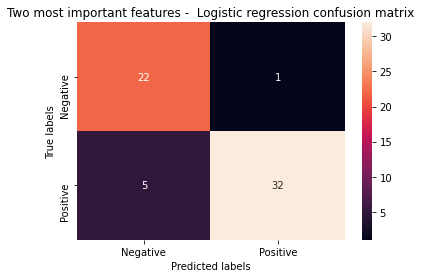

Two most important features -  Linear SVM: AUC is: 50.00%
Two most important features -  Linear SVM: F1 score is: 38.14%
Two most important features -  Linear SVM: Accuracy is: 61.67%


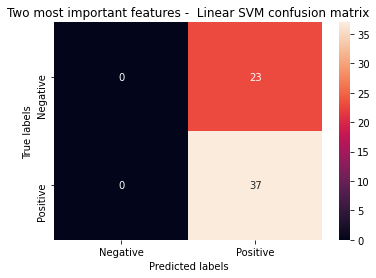

Two most important features -  SVM with RBF kernel: AUC is: 50.00%
Two most important features -  SVM with RBF kernel: F1 score is: 38.14%
Two most important features -  SVM with RBF kernel: Accuracy is: 61.67%


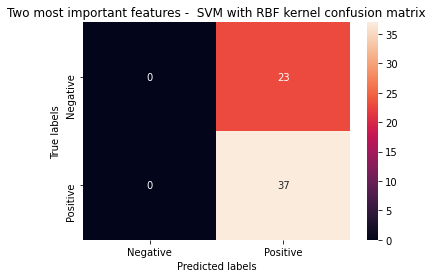

Two most important features -  Random forest: AUC is: 91.07%
Two most important features -  Random forest: F1 score is: 89.71%
Two most important features -  Random forest: Accuracy is: 90.00%


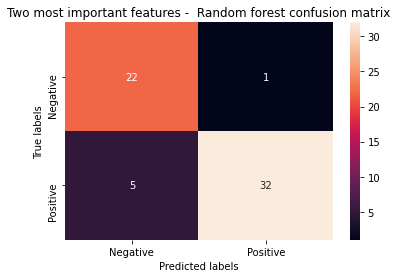

In [33]:
report_evaluation_matrics('Two most important features -  Logistic regression', classifierLR,  X_train_scaled[:,2:4],  X_test_scaled[:,2:4], y_train, y_test)
report_evaluation_matrics('Two most important features -  Linear SVM', classifierLinearSVC,  X_train_scaled[:,2:4],  X_test_scaled[:,2:4], y_train, y_test)
report_evaluation_matrics('Two most important features -  SVM with RBF kernel', classifierRBFSVC,  X_train_scaled[:,2:4],  X_test_scaled[:,2:4], y_train, y_test)
report_evaluation_matrics('Two most important features -  Random forest', classifierRF, X_train_scaled[:,2:4], X_test_scaled[:,2:4], y_train, y_test)

# e. What performs better? 2 features of the reduced dimensionality.

The PCA results are in most models better than the two most important features. This makes sense as for the PCA takes in to acount all features and not only the 2 most important ones. In the logistic regression the 2 most important feature are a bit better. We also see that the Random forest performs best in both cases with an advantage to the PCA. Random forest good results can also be explained by overfitting our results. When we had a lot of features we used a tree depth of 6, now that we have only 2 features the trees depth over fits our data.  